In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of stock files
stock_files = {
    "AAPL": "/Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/aapl.csv",
    "MSFT": "/Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/msft.csv",
    "BAC": "/Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/bac.csv",
    "C": "/Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/c.csv",
    "F": "/Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/f.csv",
    "TYM": "/Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/tym.csv",
    "WFC": "/Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/wfc.csv",
    "HMC": "//Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/hmc.csv",
    "GOOG": "/Users/ritziscol23/Dropbox/My Mac (MacBook-Pro.zyxel.com)/Downloads/Señior assignments/CSE482/stocks/goog.csv"
}

# Dictionary to store data
stock_data = {}

# (a) Load each stock file into a DataFrame
for stock, filepath in stock_files.items():
    df = pd.read_csv(filepath)
    if 'Date' in df.columns and 'Close' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.sort_values('Date')  
        df.set_index('Date', inplace=True)
        stock_data[stock] = df[['Close']]
    

In [3]:
# (b) Compute daily price change
for stock, df in stock_data.items():
    df['Price Change'] = df['Close'].diff()


In [4]:
# (c) Create a combined DataFrame with all stocks
stocks_df = pd.DataFrame(index=stock_data["AAPL"].index)  
for stock, df in stock_data.items():
    stocks_df[stock] = df['Price Change'] 
stocks_df.dropna(inplace=True)  

In [7]:
# (d) Compute pairwise correlation between stocks
correlation_matrix = stocks_df.corr()

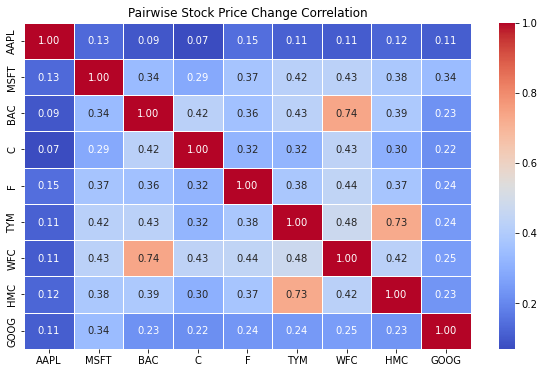

Pairwise Correlation Matrix:
          AAPL      MSFT       BAC         C         F       TYM       WFC  \
AAPL  1.000000  0.131434  0.092491  0.069320  0.145566  0.114745  0.105202   
MSFT  0.131434  1.000000  0.338146  0.286101  0.369930  0.418537  0.425708   
BAC   0.092491  0.338146  1.000000  0.424011  0.359032  0.427479  0.736532   
C     0.069320  0.286101  0.424011  1.000000  0.315519  0.320030  0.434085   
F     0.145566  0.369930  0.359032  0.315519  1.000000  0.379900  0.442713   
TYM   0.114745  0.418537  0.427479  0.320030  0.379900  1.000000  0.475332   
WFC   0.105202  0.425708  0.736532  0.434085  0.442713  0.475332  1.000000   
HMC   0.124055  0.383520  0.385629  0.304340  0.371431  0.726037  0.423748   
GOOG  0.106766  0.340559  0.225402  0.217603  0.235356  0.242243  0.251577   

           HMC      GOOG  
AAPL  0.124055  0.106766  
MSFT  0.383520  0.340559  
BAC   0.385629  0.225402  
C     0.304340  0.217603  
F     0.371431  0.235356  
TYM   0.726037  0.242243  
W

In [8]:
# (e) Compute intra-group and inter-group correlations
banking_stocks = ["BAC", "C", "WFC"]
tech_stocks = ["AAPL", "GOOG", "MSFT"]
auto_stocks = ["F", "TYM", "HMC"]

banking_corr = correlation_matrix.loc[banking_stocks, banking_stocks].mean().mean()
tech_corr = correlation_matrix.loc[tech_stocks, tech_stocks].mean().mean()
auto_corr = correlation_matrix.loc[auto_stocks, auto_stocks].mean().mean()

banking_tech_corr = correlation_matrix.loc[banking_stocks, tech_stocks].mean().mean()
banking_auto_corr = correlation_matrix.loc[banking_stocks, auto_stocks].mean().mean()
tech_auto_corr = correlation_matrix.loc[tech_stocks, auto_stocks].mean().mean()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pairwise Stock Price Change Correlation")
plt.show()

# Display results
print("Pairwise Correlation Matrix:")
print(correlation_matrix)
print(f"Banking Sector Avg Correlation: {banking_corr:.2f}")
print(f"Technology Sector Avg Correlation: {tech_corr:.2f}")
print(f"Automobile Sector Avg Correlation: {auto_corr:.2f}")
print(f"Banking-Tech Correlation: {banking_tech_corr:.2f}")
print(f"Banking-Auto Correlation: {banking_auto_corr:.2f}")
print(f"Tech-Auto Correlation: {tech_auto_corr:.2f}")

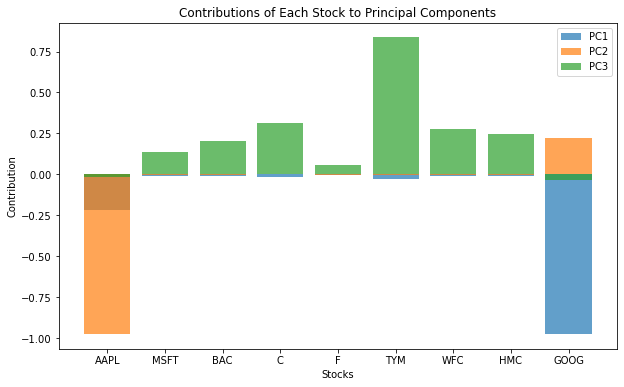

In [10]:
from sklearn.decomposition import PCA

# (f) Apply PCA for top-3 principal components
pca = PCA(n_components=3)
pca.fit(stocks_df.dropna())
principal_components = pca.components_

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.bar(stocks_df.columns, principal_components[i], alpha=0.7, label=f'PC{i+1}')
plt.title("Contributions of Each Stock to Principal Components")
plt.xlabel("Stocks")
plt.ylabel("Contribution")
plt.legend()
plt.show()